# Librerías utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploración Inicial

## Tipos de datos

In [2]:
centeno = pd.read_csv("centeno-serie-1923-2024.csv", encoding = 'utf-8')
print(centeno.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14965 entries, 0 to 14964
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           14965 non-null  object 
 1   anio                     14965 non-null  int64  
 2   campania                 14965 non-null  object 
 3   provincia_nombre         14965 non-null  object 
 4   provincia_id             14965 non-null  int64  
 5   departamento_nombre      14849 non-null  object 
 6   departamento_id          14826 non-null  float64
 7   superficie_sembrada_ha   14965 non-null  int64  
 8   superficie_cosechada_ha  13176 non-null  float64
 9   produccion_tm            13162 non-null  float64
 10  rendimiento_kgxha        13162 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB
None


## Lectura breve de datos para entender el contexto

In [3]:
print(centeno.head(2))

  cultivo_nombre  anio   campania provincia_nombre  provincia_id  \
0        centeno  1923  1923/1924     Buenos Aires             6   
1        centeno  1923  1923/1924     Buenos Aires             6   

      departamento_nombre  departamento_id  superficie_sembrada_ha  \
0           Adolfo Alsina           6007.0                    9600   
1  Adolfo Gonzales Chaves           6014.0                     200   

   superficie_cosechada_ha  produccion_tm  rendimiento_kgxha  
0                   9400.0         6204.0              600.0  
1                    182.0          167.0              920.0  


# Limpieza y transformación de datos

## Agrupar datos por provincia y año

In [4]:
centeno = centeno.groupby(["provincia_nombre", "anio"], as_index = False).agg({
    "superficie_sembrada_ha" : "sum", 
    "superficie_cosechada_ha" : "sum", 
    "produccion_tm" : "sum", 
    "rendimiento_kgxha" : "sum"
})
print(centeno)

     provincia_nombre  anio  superficie_sembrada_ha  superficie_cosechada_ha  \
0        Buenos Aires  1923                   60100                  57267.0   
1        Buenos Aires  1924                   44930                  40187.0   
2        Buenos Aires  1925                   69830                  62500.0   
3        Buenos Aires  1926                   70310                  67500.0   
4        Buenos Aires  1927                  117000                  88735.0   
...               ...   ...                     ...                      ...   
1162          Tucum�n  2020                     850                    790.0   
1163          Tucum�n  2021                     770                    730.0   
1164          Tucum�n  2022                    1040                    980.0   
1165          Tucum�n  2023                     940                    940.0   
1166          Tucum�n  2024                     890                    890.0   

      produccion_tm  rendimiento_kgxha 

# Visualizar gráficos

## Siembra desde el año 1923 hasta el año 2024

       provincia_nombre  superficie_sembrada_ha
7               Formosa                      12
21     Tierra del Fuego                     211
10             La Rioja                    1411
12             Misiones                    3119
18           Santa Cruz                    4111
16             San Juan                    9217
4            Corrientes                   10220
1             Catamarca                   10315
8                 Jujuy                   11362
2                 Chaco                   17685
3                Chubut                   20932
13              Neuqu�n                   34086
15                Salta                   35942
22              Tucum�n                   47851
11              Mendoza                  101545
14            R�o Negro                  136211
6            Entre R�os                  160616
20  Santiago del Estero                  866220
17             San Luis                 5058106
19             Santa Fe                1

Text(0, 0.5, 'Provincia')

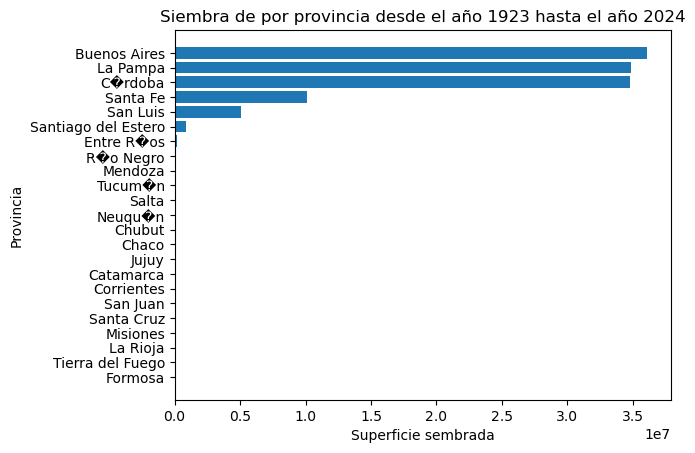

In [5]:
centenoTotal = centeno.groupby("provincia_nombre", as_index = False).sum().sort_values(by = "superficie_sembrada_ha", ascending = True)
print(centenoTotal[["provincia_nombre", "superficie_sembrada_ha"]])
plt.barh(centenoTotal["provincia_nombre"], centenoTotal["superficie_sembrada_ha"])
plt.title("Siembra de por provincia desde el año 1923 hasta el año 2024")
plt.xlabel("Superficie sembrada")
plt.ylabel("Provincia")

En este gráfico se puede observar como la siembra de centeno en Argentina desde 1973 hasta 2024 es liderada por las provincias de Buenos Aires, La Pampa y Córdoba. El resto de provincias tuvieron una siembra considerablemente más baja que estás.

## Cosecha desde el año 1923 hasta el año 2024

       provincia_nombre  superficie_cosechada_ha
7               Formosa                      6.0
21     Tierra del Fuego                     48.0
10             La Rioja                    337.0
12             Misiones                    753.0
18           Santa Cruz                   1217.0
16             San Juan                   3270.0
4            Corrientes                   3202.0
1             Catamarca                   4177.0
8                 Jujuy                   3514.0
2                 Chaco                   1278.0
3                Chubut                   6429.0
13              Neuqu�n                  17201.0
15                Salta                  13158.0
22              Tucum�n                   7416.0
11              Mendoza                  45153.0
14            R�o Negro                  43073.0
6            Entre R�os                  34734.0
20  Santiago del Estero                  89366.0
17             San Luis                 844452.0
19             Santa

Text(0, 0.5, 'Provincia')

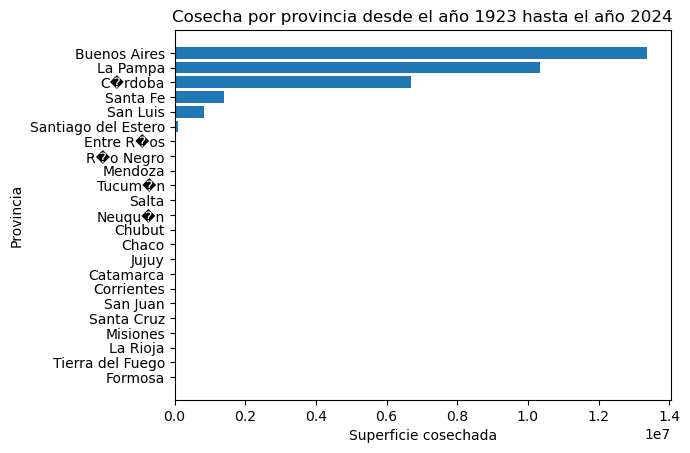

In [6]:
centenoTotal.sort_values(by = "superficie_cosechada_ha", ascending = True)
print(centenoTotal[["provincia_nombre", "superficie_cosechada_ha"]])
plt.barh(centenoTotal["provincia_nombre"], centenoTotal["superficie_cosechada_ha"])
plt.title("Cosecha por provincia desde el año 1923 hasta el año 2024")
plt.xlabel("Superficie cosechada")
plt.ylabel("Provincia")

En este gráfico se puede observar como la cosecha de centeno en Argentina desde 1973 hasta 2024 es liderada por las provincias de Buenos Aires, La Pampa y Córdoba, aunque ya no están tan parejos como lo estaban en la siembra. El resto de provincias tuvieron una cosecha considerablemente más baja que estás.

## Análisis de una provincia en específico

In [7]:
repetir = True
posiblesProvincias = centeno["provincia_nombre"].unique().tolist()
while repetir:
    provincia = input("Ingresar provincia para analizar: ")
    if provincia in posiblesProvincias:
        repetir = False
    else:
        print("Provincia no valida")
centenoProvincia = centeno[centeno["provincia_nombre"] == provincia]
print(centenoProvincia)


Ingresar provincia para analizar:  Buenos Aires


    provincia_nombre  anio  superficie_sembrada_ha  superficie_cosechada_ha  \
0       Buenos Aires  1923                   60100                  57267.0   
1       Buenos Aires  1924                   44930                  40187.0   
2       Buenos Aires  1925                   69830                  62500.0   
3       Buenos Aires  1926                   70310                  67500.0   
4       Buenos Aires  1927                  117000                  88735.0   
..               ...   ...                     ...                      ...   
97      Buenos Aires  2020                   74142                  10248.0   
98      Buenos Aires  2021                   99602                  19834.0   
99      Buenos Aires  2022                  118948                  35149.0   
100     Buenos Aires  2023                  122732                  56097.0   
101     Buenos Aires  2024                  131551                  50385.0   

     produccion_tm  rendimiento_kgxha  
0          

## Siembra en esa provincia desde el año 1923 hasta el año 2024

Text(0, 0.5, 'Superficie sembrada')

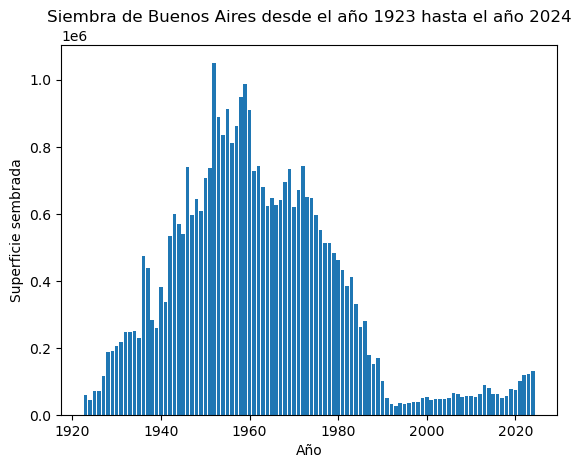

In [8]:
plt.bar(centenoProvincia["anio"], centenoProvincia["superficie_sembrada_ha"])
plt.title("Siembra de " + provincia + " desde el año 1923 hasta el año 2024")
plt.xlabel("Año")
plt.ylabel("Superficie sembrada")

En el caso de la provincia de Buenos Aires, se puede observar como el pico con mayor siembra de centeno, fue aproximadamente por 1950, durante ese tiempo, los países que estuvieron involucrados en la Segunda Guerra Mundial se estaban empezando a recuperar y por ello necesitaban importar más granos para fabricar diferentes alimentos, entre esos granos es probable que estuviera el centeno. También pudo haberse dado al gobierno que estaba en ese momento, que incentivaba al área agrícola, donde uno de sus cultivos, era el de centeno.

## Cosecha en esa provincia desde el año 1923 hasta el año 2024

Text(0, 0.5, 'Superficie cosechada')

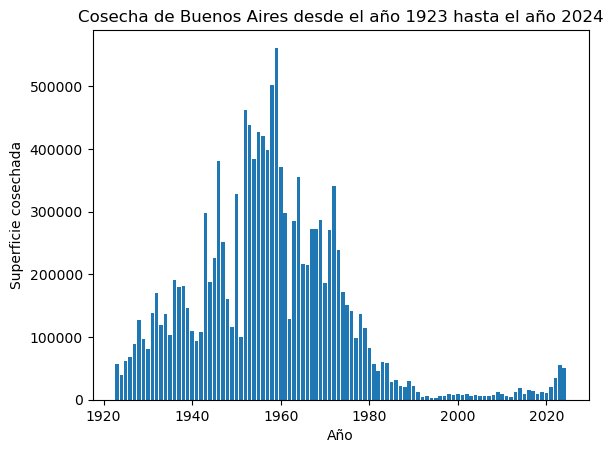

In [9]:
plt.bar(centenoProvincia["anio"], centenoProvincia["superficie_cosechada_ha"])
plt.title("Cosecha de " + provincia + " desde el año 1923 hasta el año 2024")
plt.xlabel("Año")
plt.ylabel("Superficie cosechada")

En el caso de la provincia de Buenos Aires, se puede observar como el pico con mayor cosecha es en año 1960 aproximadamente, esto se puede deber a la alta cantidad de siembra de centeno realizada en los años anteriores.

## Tendencia de siembra en esa provincia

Text(0, 0.5, 'Superficie sembrada')

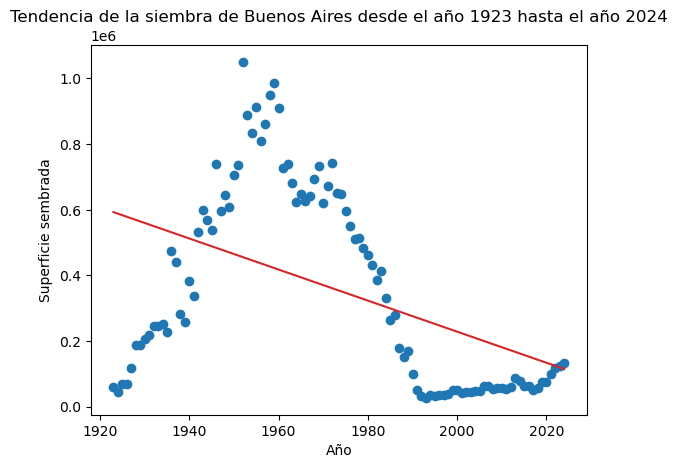

In [10]:
plt.scatter(centenoProvincia["anio"], centenoProvincia["superficie_sembrada_ha"])
m, b = np.polyfit(centenoProvincia["anio"], centenoProvincia["superficie_sembrada_ha"], 1)
plt.plot(centenoProvincia["anio"], m * centenoProvincia["anio"] + b, color = 'C3', label = 'Tendencia')
plt.title("Tendencia de la siembra de " + provincia + " desde el año 1923 hasta el año 2024")
plt.xlabel("Año")
plt.ylabel("Superficie sembrada")

En el caso de la provincia de Buenos Aires, se puede observar como la siembra de centeno fue bajando de forma significante, lo que se denota en la línea de tendencia roja, que nos muestra una tendencia negativa a través del tiempo. Esto pudo darse debido a cambios en las prácticas agrícolas o en la demanda de centeno.

## Tendencia de cosecha en esa provincia

Text(0, 0.5, 'Superficie cosechada')

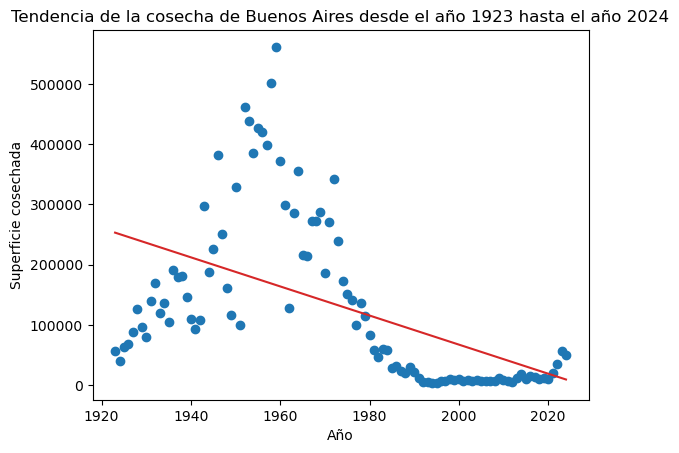

In [11]:
plt.scatter(centenoProvincia["anio"], centenoProvincia["superficie_cosechada_ha"])
m, b = np.polyfit(centenoProvincia["anio"], centenoProvincia["superficie_cosechada_ha"], 1)
plt.plot(centenoProvincia["anio"], m * centenoProvincia["anio"] + b, color = 'C3', label = 'Tendencia')
plt.title("Tendencia de la cosecha de " + provincia + " desde el año 1923 hasta el año 2024")
plt.xlabel("Año")
plt.ylabel("Superficie cosechada")

En el caso de la provincia de Buenos Aires, se puede observar como la cosecha de centeno cayó significativamente, esto se relaciona directamente a la tendencia negativa de la siembra de centeno.